In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
import keras
from keras import layers
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
import pickle


In [ ]:
df = pd.read_excel('data_half_hourly.xlsx')
df.drop('Unnamed: 0', inplace=True, axis=1)
df.drop(['real_volume','spread'], inplace=True, axis=1)
df.head()

,time,open,high,low,close,tick_volume
0,2014-05-15 08:30:00,1.37115,1.37168,1.37073,1.37157,833
1,2014-05-15 09:00:00,1.37155,1.37164,1.36850,1.36930,1450
2,2014-05-15 09:30:00,1.36930,1.36930,1.36645,1.36745,1362
3,2014-05-15 10:00:00,1.36744,1.36765,1.36598,1.36693,1560
4,2014-05-15 10:30:00,1.36693,1.36737,1.36614,1.36695,1336


In [ ]:
df['HLAvg'] = df['high'].add(df['low']).div(2)
df.head()

,time,open,high,low,close,tick_volume,HLAvg
0,2014-05-15 08:30:00,1.37115,1.37168,1.37073,1.37157,833,1.371205
1,2014-05-15 09:00:00,1.37155,1.37164,1.36850,1.36930,1450,1.370070
2,2014-05-15 09:30:00,1.36930,1.36930,1.36645,1.36745,1362,1.367875
3,2014-05-15 10:00:00,1.36744,1.36765,1.36598,1.36693,1560,1.366815
4,2014-05-15 10:30:00,1.36693,1.36737,1.36614,1.36695,1336,1.366755


In [ ]:
df['MA'] = df['HLAvg'].rolling(window=14).mean()    # We chose 14 as this is the default period used in most technical analysis tools
            # Because the window = 14 ... the first 13 row in MA will be NaN and then they will have a value .. So we may delete them
df

,time,open,high,low,close,tick_volume,HLAvg,MA
0,2014-05-15 08:30:00,1.37115,1.37168,1.37073,1.37157,833,1.371205,NaN
1,2014-05-15 09:00:00,1.37155,1.37164,1.36850,1.36930,1450,1.370070,NaN
2,2014-05-15 09:30:00,1.36930,1.36930,1.36645,1.36745,1362,1.367875,NaN
3,2014-05-15 10:00:00,1.36744,1.36765,1.36598,1.36693,1560,1.366815,NaN
4,2014-05-15 10:30:00,1.36693,1.36737,1.36614,1.36695,1336,1.366755,NaN
...,...,...,...,...,...,...,...,...
99969,2022-06-03 06:30:00,1.07566,1.07566,1.07520,1.07533,821,1.075430,1.075248
99970,2022-06-03 07:00:00,1.07534,1.07545,1.07492,1.07502,741,1.075185,1.075329
99971,2022-06-03 07:30:00,1.07502,1.07526,1.07458,1.07458,609,1.074920,1.075350
99972,2022-06-03 08:00:00,1.07458,1.07548,1.07450,1.07542,694,1.074990,1.075365


In [ ]:
df['Returns'] = np.log(df['MA']/df['MA'].shift(1))
df

,time,open,high,low,close,tick_volume,HLAvg,MA,Returns
0,2014-05-15 08:30:00,1.37115,1.37168,1.37073,1.37157,833,1.371205,NaN,NaN
1,2014-05-15 09:00:00,1.37155,1.37164,1.36850,1.36930,1450,1.370070,NaN,NaN
2,2014-05-15 09:30:00,1.36930,1.36930,1.36645,1.36745,1362,1.367875,NaN,NaN
3,2014-05-15 10:00:00,1.36744,1.36765,1.36598,1.36693,1560,1.366815,NaN,NaN
4,2014-05-15 10:30:00,1.36693,1.36737,1.36614,1.36695,1336,1.366755,NaN,NaN
...,...,...,...,...,...,...,...,...,...
99969,2022-06-03 06:30:00,1.07566,1.07566,1.07520,1.07533,821,1.075430,1.075248,0.000042
99970,2022-06-03 07:00:00,1.07534,1.07545,1.07492,1.07502,741,1.075185,1.075329,0.000075
99971,2022-06-03 07:30:00,1.07502,1.07526,1.07458,1.07458,609,1.074920,1.075350,0.000020
99972,2022-06-03 08:00:00,1.07458,1.07548,1.07450,1.07542,694,1.074990,1.075365,0.000014


In [ ]:
df=df.dropna()

In [ ]:
df=df.reset_index()
df=df.drop("index",axis=1)

#Batch size

In [ ]:
batch_size=32
reminder=df.shape[0]%batch_size
print(reminder)
df=df.drop(df.index[:reminder])
df

24


,time,open,high,low,close,tick_volume,HLAvg,MA,Returns
24,2014-05-16 03:30:00,1.37126,1.37189,1.37126,1.37166,487,1.371575,1.371211,-0.000007
25,2014-05-16 04:00:00,1.37166,1.37192,1.37147,1.37183,476,1.371695,1.371238,0.000020
26,2014-05-16 04:30:00,1.37184,1.37193,1.37164,1.37170,442,1.371785,1.371299,0.000045
27,2014-05-16 05:00:00,1.37169,1.37194,1.37161,1.37191,354,1.371775,1.371359,0.000043
28,2014-05-16 05:30:00,1.37192,1.37194,1.37151,1.37162,363,1.371725,1.371410,0.000037
...,...,...,...,...,...,...,...,...,...
99955,2022-06-03 06:30:00,1.07566,1.07566,1.07520,1.07533,821,1.075430,1.075248,0.000042
99956,2022-06-03 07:00:00,1.07534,1.07545,1.07492,1.07502,741,1.075185,1.075329,0.000075
99957,2022-06-03 07:30:00,1.07502,1.07526,1.07458,1.07458,609,1.074920,1.075350,0.000020
99958,2022-06-03 08:00:00,1.07458,1.07548,1.07450,1.07542,694,1.074990,1.075365,0.000014


In [ ]:
df=df.reset_index()
df=df.drop("index",axis=1)
df=df.set_index("time")
df

,open,high,low,close,tick_volume,HLAvg,MA,Returns
time,,,,,,,,
2014-05-16 03:30:00,1.37126,1.37189,1.37126,1.37166,487,1.371575,1.371211,-0.000007
2014-05-16 04:00:00,1.37166,1.37192,1.37147,1.37183,476,1.371695,1.371238,0.000020
2014-05-16 04:30:00,1.37184,1.37193,1.37164,1.37170,442,1.371785,1.371299,0.000045
2014-05-16 05:00:00,1.37169,1.37194,1.37161,1.37191,354,1.371775,1.371359,0.000043
2014-05-16 05:30:00,1.37192,1.37194,1.37151,1.37162,363,1.371725,1.371410,0.000037
...,...,...,...,...,...,...,...,...
2022-06-03 06:30:00,1.07566,1.07566,1.07520,1.07533,821,1.075430,1.075248,0.000042
2022-06-03 07:00:00,1.07534,1.07545,1.07492,1.07502,741,1.075185,1.075329,0.000075
2022-06-03 07:30:00,1.07502,1.07526,1.07458,1.07458,609,1.074920,1.075350,0.000020


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df["scaled_return"]= scaler.fit_transform(df[['Returns']].values)



In [ ]:
pickle.dump(scaler,open("scaler.bin",'wb'))

In [ ]:
df

,open,high,low,close,tick_volume,HLAvg,MA,Returns,scaled_return
time,,,,,,,,,
2014-05-16 03:30:00,1.37126,1.37189,1.37126,1.37166,487,1.371575,1.371211,-0.000007,0.523200
2014-05-16 04:00:00,1.37166,1.37192,1.37147,1.37183,476,1.371695,1.371238,0.000020,0.528006
2014-05-16 04:30:00,1.37184,1.37193,1.37164,1.37170,442,1.371785,1.371299,0.000045,0.532525
2014-05-16 05:00:00,1.37169,1.37194,1.37161,1.37191,354,1.371775,1.371359,0.000043,0.532287
2014-05-16 05:30:00,1.37192,1.37194,1.37151,1.37162,363,1.371725,1.371410,0.000037,0.531192
...,...,...,...,...,...,...,...,...,...
2022-06-03 06:30:00,1.07566,1.07566,1.07520,1.07533,821,1.075430,1.075248,0.000042,0.532095
2022-06-03 07:00:00,1.07534,1.07545,1.07492,1.07502,741,1.075185,1.075329,0.000075,0.538162
2022-06-03 07:30:00,1.07502,1.07526,1.07458,1.07458,609,1.074920,1.075350,0.000020,0.527969


In [ ]:
df.to_excel("final_half_df.xlsx")

In [ ]:
features=df.drop(["open","high","low","HLAvg","MA","Returns","close","tick_volume"],axis=1)


In [ ]:
train_size=int((0.8*df.shape[0])-((0.8*df.shape[0])% batch_size))
print(train_size)
test_size=(df.shape[0]-train_size)//2
print(test_size)

val_size=(df.shape[0]-train_size)//2
print(val_size)

window_size=2*batch_size #64 hours
df_train = features[:- val_size - test_size]
df_val = features[- val_size - test_size - window_size:- test_size]
df_test = features[- test_size - window_size:]




79936
10000
10000


In [ ]:
df_test


,scaled_return
time,
2021-08-13 10:30:00,0.525946
2021-08-13 11:00:00,0.525612
2021-08-13 11:30:00,0.524779
2021-08-13 12:00:00,0.526001
2021-08-13 12:30:00,0.530503
...,...
2022-06-03 06:30:00,0.532095
2022-06-03 07:00:00,0.538162
2022-06-03 07:30:00,0.527969


In [ ]:

def features_labels1(values):
  x,y=[],[]
  for i in range(window_size, len(values)):
        x.append(values[i-window_size:i])
        y.append(values[i])

  x=np.array(x)
  y=np.array(y)
  x = np.reshape(x, (x.shape[0], x.shape[1], 1))

  return x,y

In [ ]:

def features_labels2(df):
  x,y=[],[]
  for i in range(df.shape[0]-window_size-1):
    x.append(np.array(df[i:i+window_size]))
    y.append(features['scaled_return'].iloc[i+window_size])
    

  x=np.array(x)
  y=np.array(y)
  return x,y

In [ ]:
x_train,y_train=features_labels1(features[['scaled_return']].values)
x_val,y_val=features_labels1(df_val[['scaled_return']].values)


In [ ]:
x_train.shape

(99872, 64, 1)

In [ ]:
model = keras.models.Sequential()
model.add(layers.LSTM(76, input_shape=(x_train.shape[1], 1), return_sequences = False))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1))
model.compile(loss="mse", optimizer='Adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 76)                23712     
                                                                 
 dropout (Dropout)           (None, 76)                0         
                                                                 
 dense (Dense)               (None, 1)                 77        
                                                                 
Total params: 23,789
Trainable params: 23,789
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x=x_train, y=y_train ,epochs=50,batch_size=32,validation_data=(x_val,y_val),shuffle=False)

Epoch 1/50
3121/3121 [==============================] - 22s 5ms/step - loss: 0.0016 - accuracy: 2.0026e-05 - val_loss: 1.4000e-04 - val_accuracy: 0.0000e+00
Epoch 2/50
3121/3121 [==============================] - 15s 5ms/step - loss: 4.3775e-04 - accuracy: 2.0026e-05 - val_loss: 9.6924e-05 - val_accuracy: 0.0000e+00
Epoch 3/50
3121/3121 [==============================] - 15s 5ms/step - loss: 1.8980e-04 - accuracy: 2.0026e-05 - val_loss: 5.4940e-05 - val_accuracy: 0.0000e+00
Epoch 4/50
3121/3121 [==============================] - 15s 5ms/step - loss: 1.2391e-04 - accuracy: 2.0026e-05 - val_loss: 4.8074e-05 - val_accuracy: 0.0000e+00
Epoch 5/50
3121/3121 [==============================] - 15s 5ms/step - loss: 1.1345e-04 - accuracy: 2.0026e-05 - val_loss: 5.1003e-05 - val_accuracy: 0.0000e+00
Epoch 6/50
3121/3121 [==============================] - 15s 5ms/step - loss: 1.0958e-04 - accuracy: 2.0026e-05 - val_loss: 4.6936e-05 - val_accuracy: 0.0000e+00
Epoch 7/50
3121/3121 [================

In [ ]:
y_pred=model.predict(x_train)

In [ ]:
len(np.unique(y_pred))/len(y_pred)

0.9678688721563602

In [ ]:
filename = 'finalized_model.sav'
keras.models.save_model(model, filename)


INFO:tensorflow:Assets written to: finalized_model.sav/assets


INFO:tensorflow:Assets written to: finalized_model.sav/assets


In [ ]:
import os

In [ ]:
!zip -r /content/file.zip /content/finalized_model.sav/


  adding: content/finalized_model.sav/ (stored 0%)
  adding: content/finalized_model.sav/saved_model.pb (deflated 90%)
  adding: content/finalized_model.sav/assets/ (stored 0%)
  adding: content/finalized_model.sav/variables/ (stored 0%)
  adding: content/finalized_model.sav/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: content/finalized_model.sav/variables/variables.index (deflated 60%)
  adding: content/finalized_model.sav/keras_metadata.pb (deflated 86%)


In [ ]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras 
import tensorflow as tf

In [ ]:
df=pd.read_excel("final_half_df.xlsx")
df=df.set_index("time")
df

,open,high,low,close,tick_volume,HLAvg,MA,Returns,scaled_return
time,,,,,,,,,
2014-05-16 03:30:00,1.37126,1.37189,1.37126,1.37166,487,1.371575,1.371211,-0.000007,0.523200
2014-05-16 04:00:00,1.37166,1.37192,1.37147,1.37183,476,1.371695,1.371238,0.000020,0.528006
2014-05-16 04:30:00,1.37184,1.37193,1.37164,1.37170,442,1.371785,1.371299,0.000045,0.532525
2014-05-16 05:00:00,1.37169,1.37194,1.37161,1.37191,354,1.371775,1.371359,0.000043,0.532287
2014-05-16 05:30:00,1.37192,1.37194,1.37151,1.37162,363,1.371725,1.371410,0.000037,0.531192
...,...,...,...,...,...,...,...,...,...
2022-06-03 06:30:00,1.07566,1.07566,1.07520,1.07533,821,1.075430,1.075248,0.000042,0.532095
2022-06-03 07:00:00,1.07534,1.07545,1.07492,1.07502,741,1.075185,1.075329,0.000075,0.538162
2022-06-03 07:30:00,1.07502,1.07526,1.07458,1.07458,609,1.074920,1.075350,0.000020,0.527969


In [ ]:
features=df.drop(["open","high","low","HLAvg","MA","Returns",'close','tick_volume'],axis=1)

In [ ]:
from tensorflow import keras
#model = keras.models.load_model('')
scaler=pickle.load(open("scaler.bin",'rb'))
model = tf.keras.models.load_model("finalized_model.sav")


In [ ]:
window_size=64
def features_labels1(values):
  x,y=[],[]
  for i in range(window_size, len(values)):
        x.append(values[i-window_size:i])
        y.append(values[i])

  x=np.array(x)
  y=np.array(y)
  x = np.reshape(x, (x.shape[0], x.shape[1], 1))

  return x,y

x,y=features_labels1(features[['scaled_return']].values)

In [ ]:
x.shape

(99872, 64, 1)

In [ ]:
y_pred=model.predict(x)

In [ ]:
y_pred.shape

(99872, 1)

In [ ]:
df.shape

(99936, 9)

In [ ]:
df['pred_scaled'] = np.pad(y_pred.reshape(y_pred.shape[0]), (window_size, 0), mode='constant', constant_values=np.nan)


In [ ]:
df['pred_returns'] = scaler.inverse_transform(df[['pred_scaled']].values)
df

,open,high,low,close,tick_volume,HLAvg,MA,Returns,scaled_return,pred_scaled,pred_returns
time,,,,,,,,,,,
2014-05-16 03:30:00,1.37126,1.37189,1.37126,1.37166,487,1.371575,1.371211,-0.000007,0.523200,NaN,NaN
2014-05-16 04:00:00,1.37166,1.37192,1.37147,1.37183,476,1.371695,1.371238,0.000020,0.528006,NaN,NaN
2014-05-16 04:30:00,1.37184,1.37193,1.37164,1.37170,442,1.371785,1.371299,0.000045,0.532525,NaN,NaN
2014-05-16 05:00:00,1.37169,1.37194,1.37161,1.37191,354,1.371775,1.371359,0.000043,0.532287,NaN,NaN
2014-05-16 05:30:00,1.37192,1.37194,1.37151,1.37162,363,1.371725,1.371410,0.000037,0.531192,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-06-03 06:30:00,1.07566,1.07566,1.07520,1.07533,821,1.075430,1.075248,0.000042,0.532095,0.531317,0.000038
2022-06-03 07:00:00,1.07534,1.07545,1.07492,1.07502,741,1.075185,1.075329,0.000075,0.538162,0.538702,0.000078
2022-06-03 07:30:00,1.07502,1.07526,1.07458,1.07458,609,1.074920,1.075350,0.000020,0.527969,0.532725,0.000046


In [ ]:
df['pred_MA'] = df['MA'].mul(np.exp(df['pred_returns'].shift(-1))).shift(1) # Log Returns
df


,open,high,low,close,tick_volume,HLAvg,MA,Returns,scaled_return,pred_scaled,pred_returns,pred_MA
time,,,,,,,,,,,,
2014-05-16 03:30:00,1.37126,1.37189,1.37126,1.37166,487,1.371575,1.371211,-0.000007,0.523200,NaN,NaN,NaN
2014-05-16 04:00:00,1.37166,1.37192,1.37147,1.37183,476,1.371695,1.371238,0.000020,0.528006,NaN,NaN,NaN
2014-05-16 04:30:00,1.37184,1.37193,1.37164,1.37170,442,1.371785,1.371299,0.000045,0.532525,NaN,NaN,NaN
2014-05-16 05:00:00,1.37169,1.37194,1.37161,1.37191,354,1.371775,1.371359,0.000043,0.532287,NaN,NaN,NaN
2014-05-16 05:30:00,1.37192,1.37194,1.37151,1.37162,363,1.371725,1.371410,0.000037,0.531192,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-03 06:30:00,1.07566,1.07566,1.07520,1.07533,821,1.075430,1.075248,0.000042,0.532095,0.531317,0.000038,1.075243
2022-06-03 07:00:00,1.07534,1.07545,1.07492,1.07502,741,1.075185,1.075329,0.000075,0.538162,0.538702,0.000078,1.075332
2022-06-03 07:30:00,1.07502,1.07526,1.07458,1.07458,609,1.074920,1.075350,0.000020,0.527969,0.532725,0.000046,1.075378


In [ ]:
df=df[window_size:]

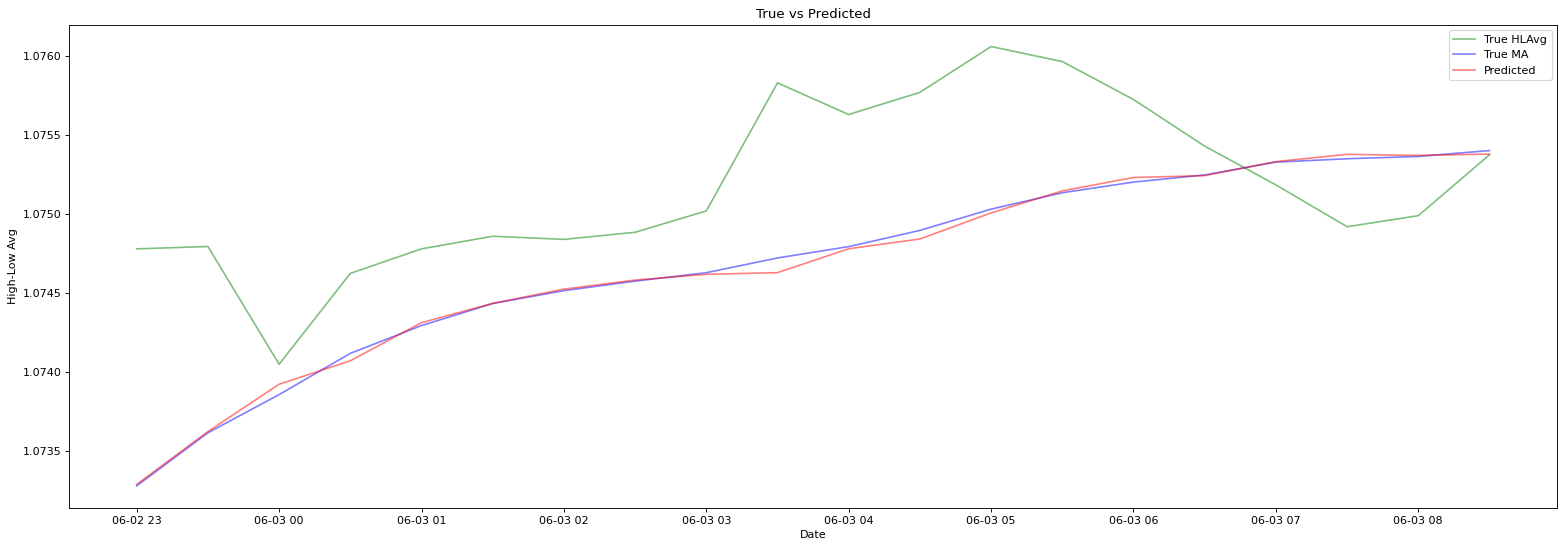

In [ ]:
plt.figure(figsize=(24, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(df['HLAvg'][-20:], color = 'green', label = 'True HLAvg', alpha=0.5)
plt.plot(df['MA'][-20:], color = 'blue', label = 'True MA', alpha=0.5)
plt.plot(df['pred_MA'][-20:], color = 'red', label = 'Predicted', alpha=0.5)
plt.title('True vs Predicted')
plt.xlabel('Date')
plt.ylabel('High-Low Avg')
plt.legend()
plt.show()